# Measures of Variability

We'll be working with a data set that describes characteristics of houses sold between 2006 and 2010 in the city of Ames (located in the American state of Iowa). There are 2930 rows in the data set, and each row describes a house. For each house there are 82 characteristics described, which means there are 82 columns in the data set.

In [1]:
import pandas as pd

In [2]:
houses = pd.read_table("AmesHousing_1.txt")

In [3]:
houses.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,131770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


### The Range

In [4]:
def find_range(array):
    return max(array) - min(array)

In [5]:
years = houses['Yr Sold'].unique()
years

array([2010, 2009, 2008, 2007, 2006], dtype=int64)

In [6]:
range_by_year = {}

for year in years:
    range_by_year[year] = find_range(houses[houses['Yr Sold'] == year]['SalePrice'])
    
range_by_year    

{2010: 598868, 2009: 575100, 2008: 601900, 2007: 715700, 2006: 590000}

Prices had the greatest variability in 2007. Then the variability started to decrease until 2010 when there was a short increase in variability compared to the previous year (2009).

### The Average Distance

In [7]:
def avg_dist(array):
    mean = sum(array)/len(array)
    distances = []
    for element in array:
        distance = element - mean
        distances.append(distance)
        
    return sum(distances)/len(distances)

In [8]:
C = [1,1,1,1,1,1,1,1,1,21]

C_average_distance = avg_dist(C)
C_average_distance

0.0

### The Mean Absolute Deviation

In [9]:
def mean_abs_dist(array):
    mean = sum(array)/len(array)
    distances = []
    for element in array:
        distance = abs(element-mean)
        distances.append(distance)
        
    return sum(distances)/len(distances)

In [10]:
C_mean_absolute_distance = mean_abs_dist(C)
C_mean_absolute_distance

3.6

### The Variance

In [11]:
def variance(array):
    mean = sum(array)/len(array)
    distances = []
    for element in array:
        distance = (element-mean) ** 2
        distances.append(distance)
        
    return sum(distances)/len(distances)

In [12]:
C_variance = variance(C)
C_variance

36.0

### The Standard Deviation

In [13]:
from math import sqrt

def sd(array):
    mean = sum(array)/len(array)
    distances=[]
    for element in array:
        distance = (element-mean) ** 2
        distances.append(distance)
        
    return sqrt(sum(distances)/len(distances))

In [14]:
C_standard_deviation = sd(C)
C_standard_deviation

6.0

In [15]:
sd(houses['SalePrice'])

79873.05865192247

In [16]:
houses['SalePrice'].mean()

180796.0600682594

On average, sale prices vary by roughly \$79,873 above and below a mean of \$180,796.

### Visualizing variability around the mean

In [17]:
import matplotlib.pyplot as plt

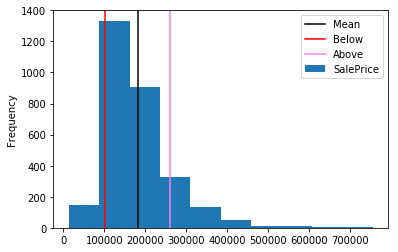

In [18]:
mean = houses['SalePrice'].mean()
st_dev = sd(houses['SalePrice'])

houses['SalePrice'].plot.hist()
plt.axvline(mean, color = 'Black', label = 'Mean')
plt.axvline(mean - st_dev, color = 'Red', label = 'Below')
plt.axvline(mean + st_dev, color = 'Violet', label = 'Above')
plt.legend()
plt.show()

In [19]:
years = {}

for year in houses['Yr Sold'].unique():
    years[year] = sd(houses[houses['Yr Sold'] == year]['SalePrice'])

In [20]:
greatest_variability = max(years, key = years.get)
greatest_variability

2006

In [21]:
lowest_variability = min(years, key = years.get)
lowest_variability

2010

### Standard Deviation as a Measure of Spread

In [22]:
for i in range(1,5):
    sample = houses['SalePrice'].sample(50, random_state = i)
    st_dev = sd(sample)
    print('Sample ' + str(i) + ': ' + str(st_dev))

Sample 1: 81785.0811515768
Sample 2: 100370.62998094413
Sample 3: 60676.038515710636
Sample 4: 64436.40016450328


In [23]:
sample1 = houses['Year Built'].sample(50, random_state = 1)
sample2 = houses['Year Built'].sample(50, random_state = 2)

In [24]:
st_dev1 = sd(sample1)
print(st_dev1)
st_dev2 = sd(sample2)
print(st_dev2)

29.239589600403075
32.466234767832255


Sample 2 has a bigger spread!

### The Sample Standard Deviation

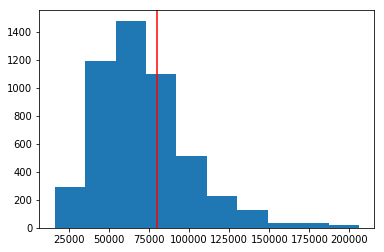

In [25]:
s_d = []
for i in range(5000):
    s = houses['SalePrice'].sample(10,random_state=i)
    s_d.append(sd(s))
    
plt.hist(s_d)
plt.axvline(sd(houses['SalePrice']), color = 'r')
plt.show()

The sample standard deviation underestimates the population standard deviation.

In [26]:
sum(s_d) / 5000

71303.64762671624

In [27]:
sd(houses['SalePrice'])

79873.05865192247

### Bessel's Correction

In [28]:
def sdb(array):
    mean = sum(array)/(len(array))
    distances=[]
    for element in array:
        distance = (element-mean) ** 2
        distances.append(distance)
        
    return sqrt(sum(distances)/(len(distances)-1))

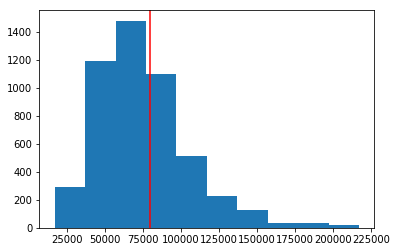

In [29]:
s_d_b = []

for i in range(5000):
    s = houses['SalePrice'].sample(10,random_state=i)
    s_d_b.append(sdb(s))
    
plt.hist(s_d_b)
plt.axvline(sdb(houses['SalePrice']), c = 'r')
plt.show()

Bessel's correction added some visible improvements and partially corrected the underestimation problem.

### Standard Deviation and Variance in Pandas and Numpy

In [30]:
from numpy import std, var

In [31]:
sample = houses.sample(100, random_state = 1)

pandas_std = sample['SalePrice'].std(ddof=1)
numpy_std = std(sample['SalePrice'],ddof=1)
equal_stds = (pandas_std == numpy_std)
equal_stds

True

In [32]:
pandas_var = sample['SalePrice'].var(ddof=1)
numpy_var = var(sample['SalePrice'],ddof=1)
equal_vars = pandas_var == numpy_var
equal_vars

True

### Sample Variance as an Unbiased Estimator

In [39]:
population = [0, 3, 6]

samples = [[0,3], [0,6], [3,0], [3,6], [6,0], [6,3]] #sample without replacement

In [34]:
pop_var = var(population, ddof = 0)
pop_var

6.0

In [35]:
pop_std = std(population, ddof = 0)
pop_std

2.4494897427831779

In [36]:
stds = []
variances = []

for s in samples:
    stds.append(std(s, ddof = 1))
    variances.append(var(s, ddof = 1))
    
mean_std = sum(stds) / len(stds)
mean_var = sum(variances) / len(variances)

In [37]:
equal_std = (pop_std == mean_std)
equal_std

False

In [38]:
equal_var = (pop_var == mean_var)
equal_var

False